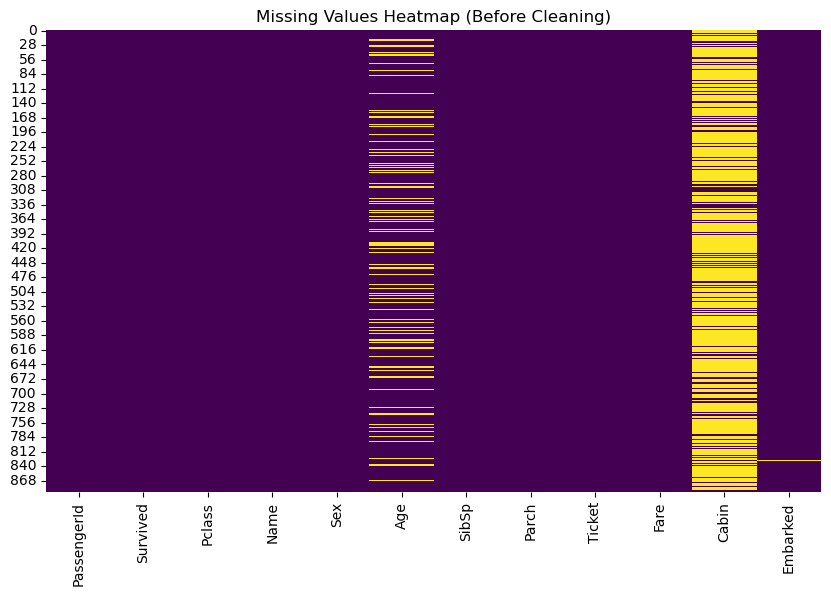

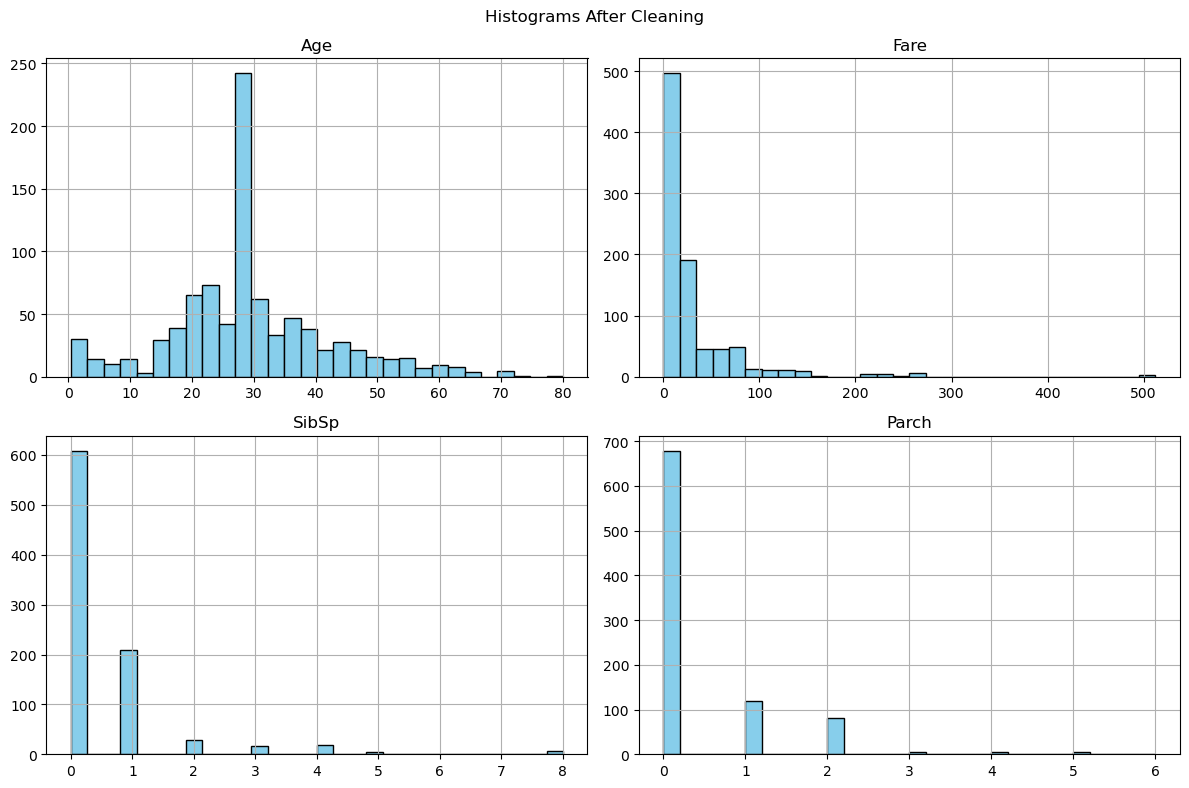

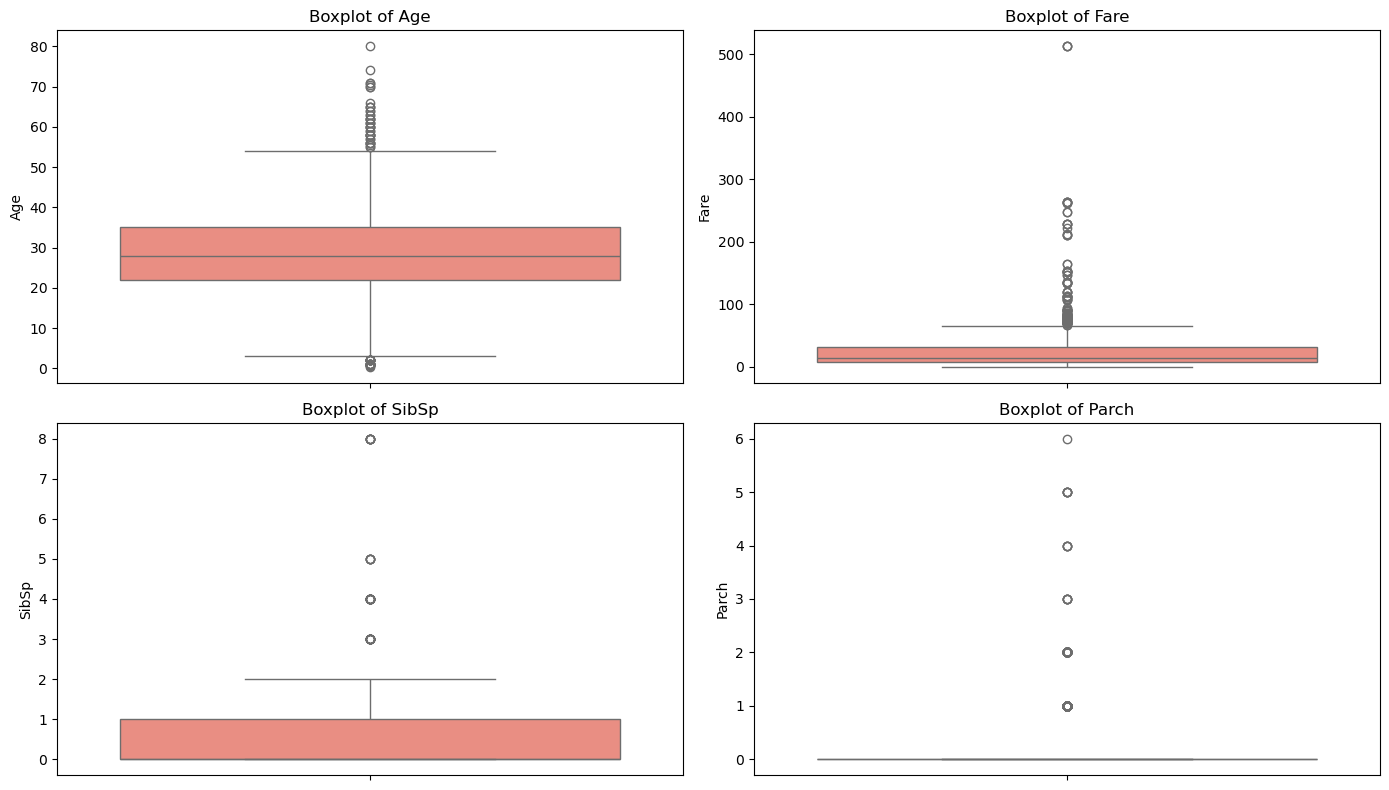

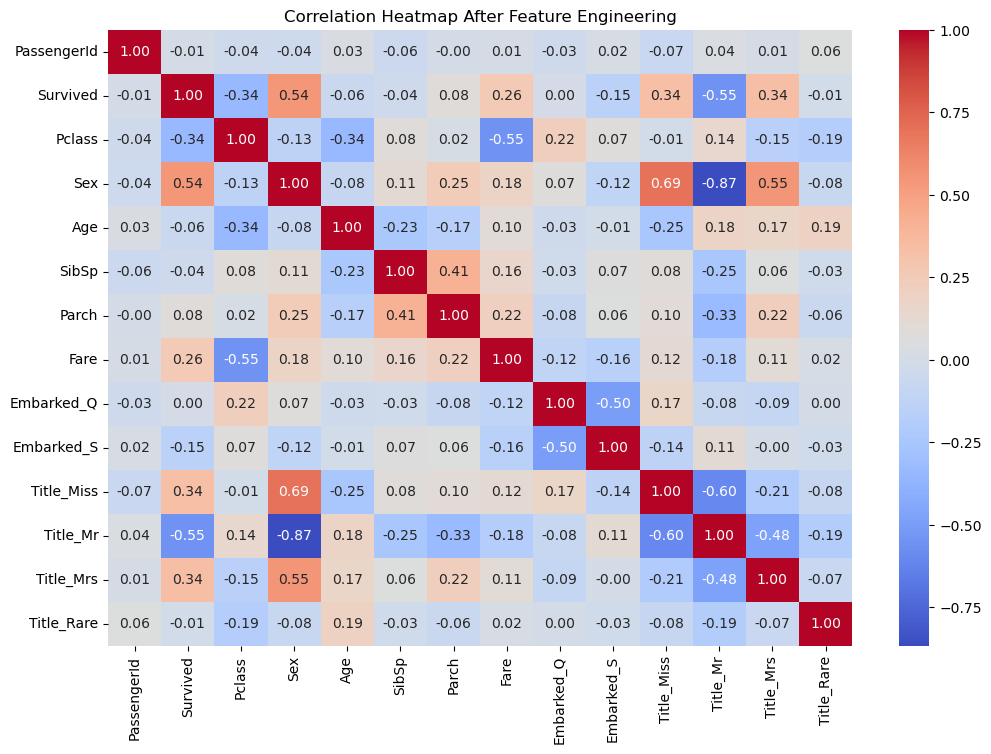

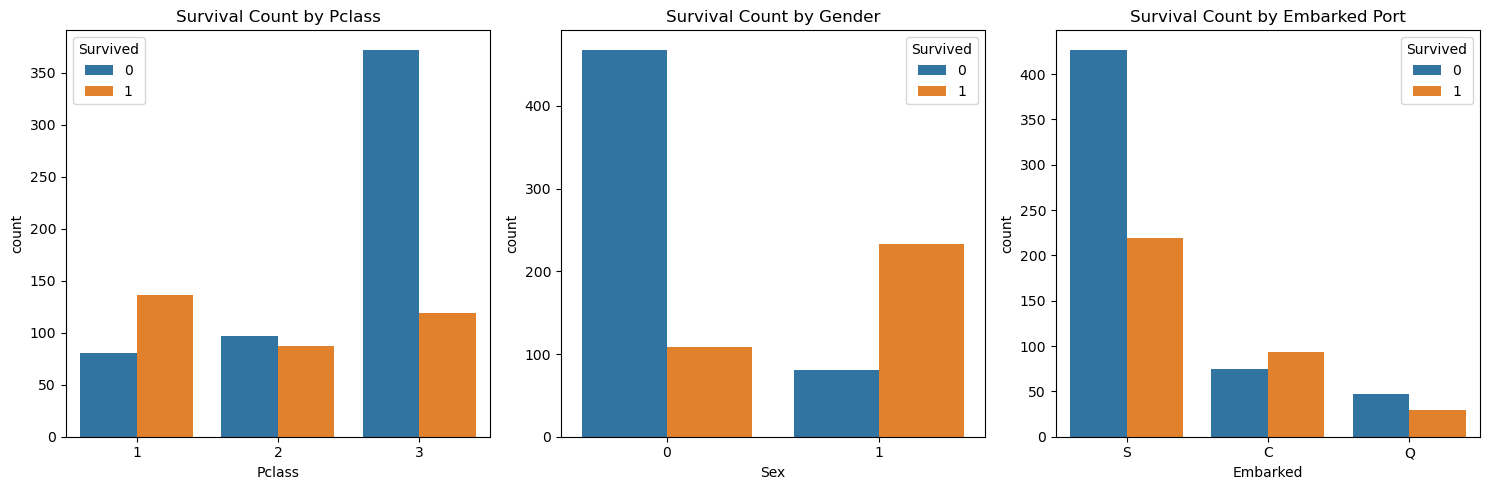

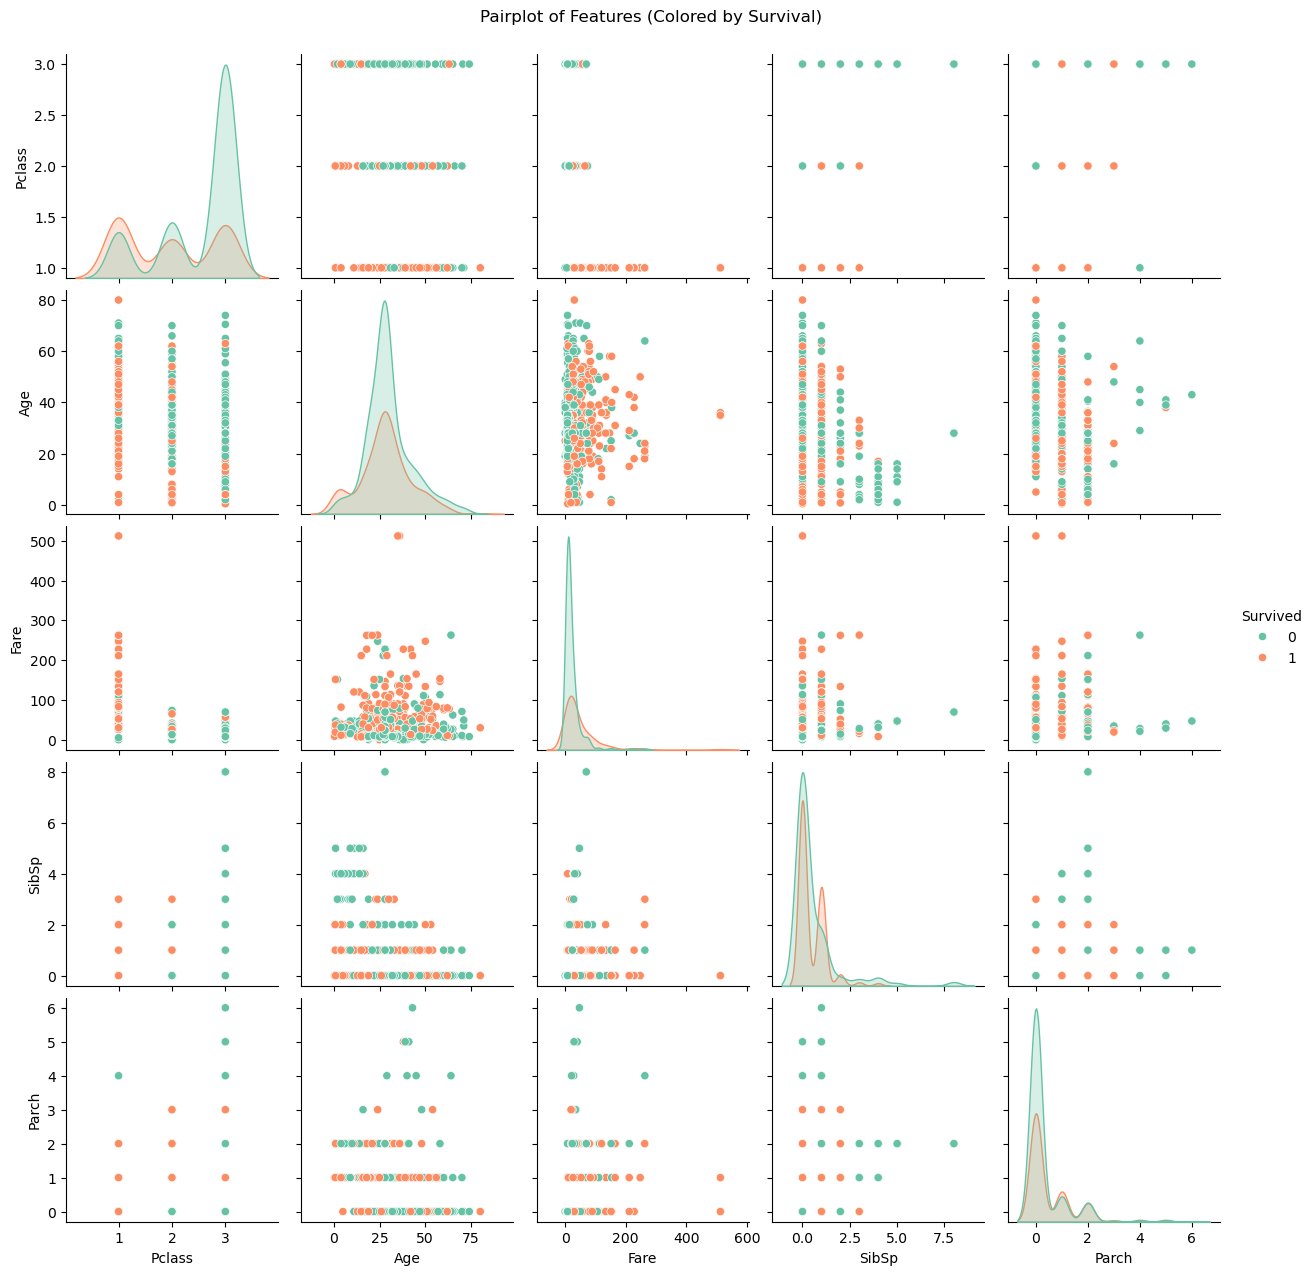

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
                                   'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

original_embarked = df['Embarked']
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)
df.drop('Name', axis=1, inplace=True)

df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, figsize=(12, 8), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle("Histograms After Cleaning")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color="salmon")
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Pclass")

plt.subplot(1, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")

plt.subplot(1, 3, 3)
sns.countplot(x=original_embarked, hue='Survived', data=pd.concat([original_embarked, df['Survived']], axis=1))
plt.title("Survival Count by Embarked Port")
plt.tight_layout()
plt.show()

sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue="Survived", palette="Set2")
plt.suptitle("Pairplot of Features (Colored by Survival)", y=1.02)
plt.show()
